In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

### Loading data into dataframe and get data info to get an estimation of null data

In [2]:
df = pd.read_excel('churn_to_AverageSales.xlsx') #ChurnPerdictFinal.xlsx
print(df.head(5))
print(df.info())

   Unnamed: 0  ... average sales
0           0  ...     22360.466
1           1  ...       198.190
2           2  ...     25754.008
3           3  ...      1242.890
4           4  ...      1370.000

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13196 entries, 0 to 13195
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                13196 non-null  int64         
 1   bussinesID                13196 non-null  object        
 2   billing_cycle             13196 non-null  object        
 3   country                   12780 non-null  object        
 4   created_on                13196 non-null  datetime64[ns]
 5   last_login                13196 non-null  object        
 6   tenure                    13196 non-null  int64         
 7   stores/franchise          13196 non-null  int64         
 8   no_of_repair_jobs         13196 non-null  int

In [3]:
df.columns

Index(['Unnamed: 0', 'bussinesID', 'billing_cycle', 'country', 'created_on',
       'last_login', 'tenure', 'stores/franchise', 'no_of_repair_jobs',
       'no_of_customers', 'total_revenue', 'amount_receivable',
       'no_of_purchases', 'use_Paypal', 'use_Cayan', 'use_Stripe',
       'use_MailChimp', 'use_PaypalHere', 'use_SquareDeep',
       'use_MobileSentrix', 'use_CustomerPortal', 'use_PrintNode',
       'use_Square', 'use_SmsGlobal', 'use_SmsBroadcast', 'use_ClickaTell',
       'use_RingCentral', 'use_Square.1', 'use_RepairDeskPay', 'use_FreePBX',
       'use_GoogleCloudPrint', 'current_bussiness_status', 'average sales'],
      dtype='object')

### Target Column stats, Inbalance column

In [4]:
df['current_bussiness_status'].value_counts()

0    11954
1     1242
Name: current_bussiness_status, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Not Churn / Churn ')

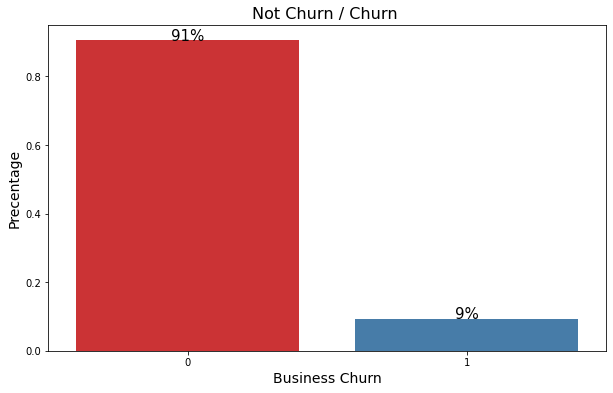

In [7]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
g = sns.barplot(df['current_bussiness_status'], df['current_bussiness_status'], palette='Set1', estimator=lambda x: len(x) / len(df) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Business Churn', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Not Churn / Churn ', fontsize=16)

### Encoding into 0,1 form

In [8]:
df.replace({False: 0, True: 1}, inplace=True)
df.head(5)

,Unnamed: 0,bussinesID,billing_cycle,country,created_on,last_login,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,average sales
0,0,c4ca4238a0b923820dcc509a6f75849b,Monthly,United Arab Emirates,2015-07-24 17:45:12,2020-12-16 05:09:02,5,5,593,5465,111802.33,43684.29,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,22360.466
1,1,45c48cce2e2d7fbdea1afc51c7c6ad26,Monthly,United Kingdom,2015-02-27 11:32:44,(NULL),0,1,3,2,198.19,89.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198.190
2,2,d3d9446802a44259755d38e6d163e820,Monthly,United States,2015-02-28 01:32:05,2021-01-04 11:02:20,5,10,567,26,257540.08,121470.29,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,25754.008
3,3,6512bd43d9caa6e02c990b0a82652dca,Monthly,United Kingdom,2015-03-02 06:01:30,2017-12-05 03:00:01,2,2,43,38,2485.78,2030.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1242.890
4,4,aab3238922bcc25a6f606eb525ffdc56,Monthly,Pakistan,2015-03-03 02:28:23,2015-12-01 06:37:11,0,1,9,2,1370.00,1120.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1370.000


In [9]:
print(df['billing_cycle'].value_counts())
df['billing_cycle'].replace({'Monthly':0, 'Yearly':1}, inplace=True)

Monthly    12618
Yearly       578
Name: billing_cycle, dtype: int64


### Feature Selection

1. Correlation Matrix with Heatmap
2. Embedded Method
3. Feature Importance

### Corelation 
Correlation (to be exact Correlation in Statistic) is a measure of a mutual relationship between two variables whether they are causal or not.(https://radiant-brushlands-42789.herokuapp.com/towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f#:~:text=Correlation%20(to%20be%20exact%20Correlation,Categorical%2C%20Continous%20and%20Categorical).)
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable(https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

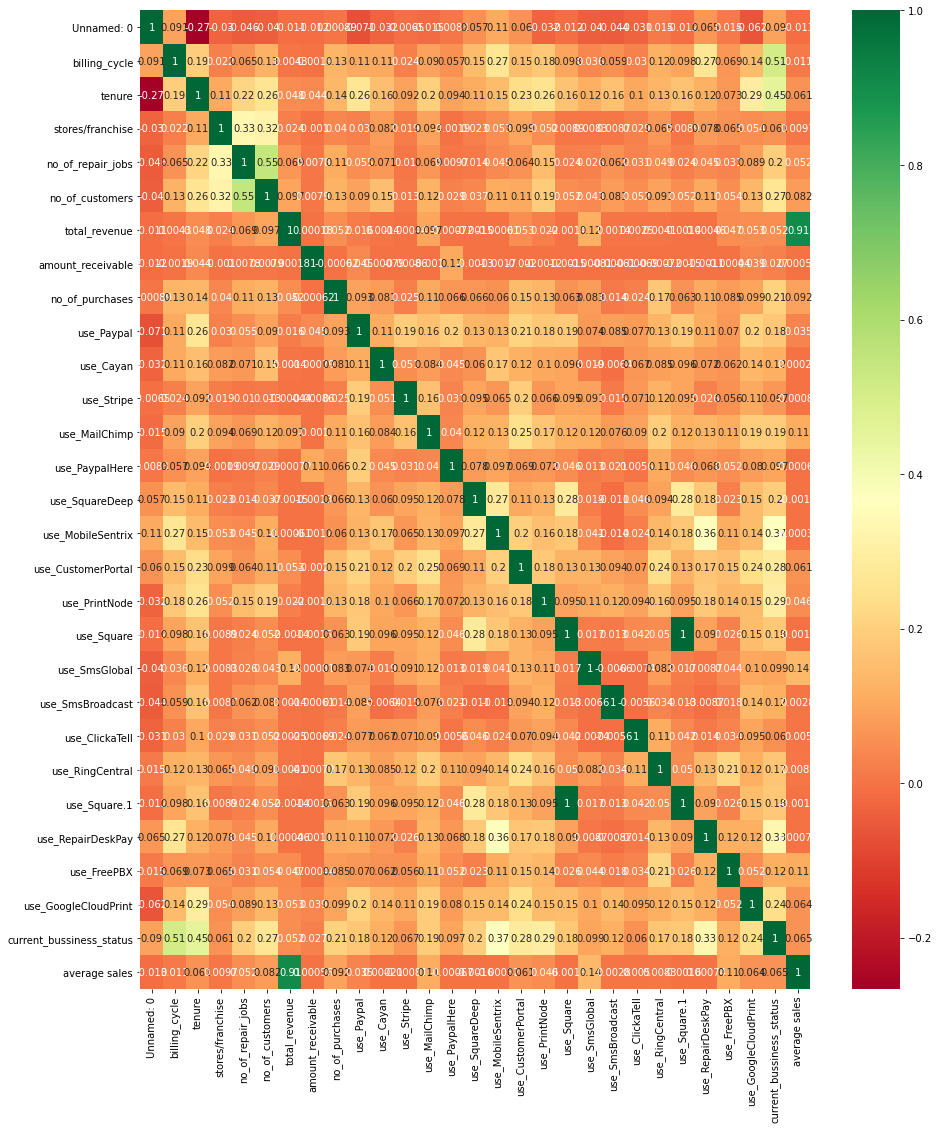

In [10]:
plt.figure(figsize=(15,18))
cor = df.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns.heatmap(cor, annot=True,cmap="RdYlGn")
# plt.xticks(rotation=45) 
plt.show()

#### Droping un usable columns
business id createdon and last login as they seems un usable columns

In [11]:
df.drop(['Unnamed: 0','bussinesID','country','created_on','last_login'], axis=1, inplace=True)

### Embedded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.(https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

In [12]:
#Using lasso
X = df.drop("current_bussiness_status",1)   #Feature Matrix
y = df["current_bussiness_status"]          #Target Variable

In [13]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 5974506764.631354
Best score using built-in LassoCV: 0.000000


In [14]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 0 variables and eliminated the other 27 variables


embeded method did not give any usable results beacuse our features have week relationship



### Feature Importance
we can get the feature importance of each feature of our dataset by using the feature importance property of the model.
Feature importance gives us a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.(https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

[0.16726909 0.10119931 0.01358305 0.07578991 0.07055259 0.08766323
 0.0796116  0.04462221 0.0099729  0.00548676 0.00377282 0.00968515
 0.00322804 0.01235653 0.06569256 0.02722848 0.02785591 0.00686736
 0.00339214 0.00336035 0.00393857 0.00513337 0.00621844 0.04579085
 0.00247917 0.02080895 0.09644066]


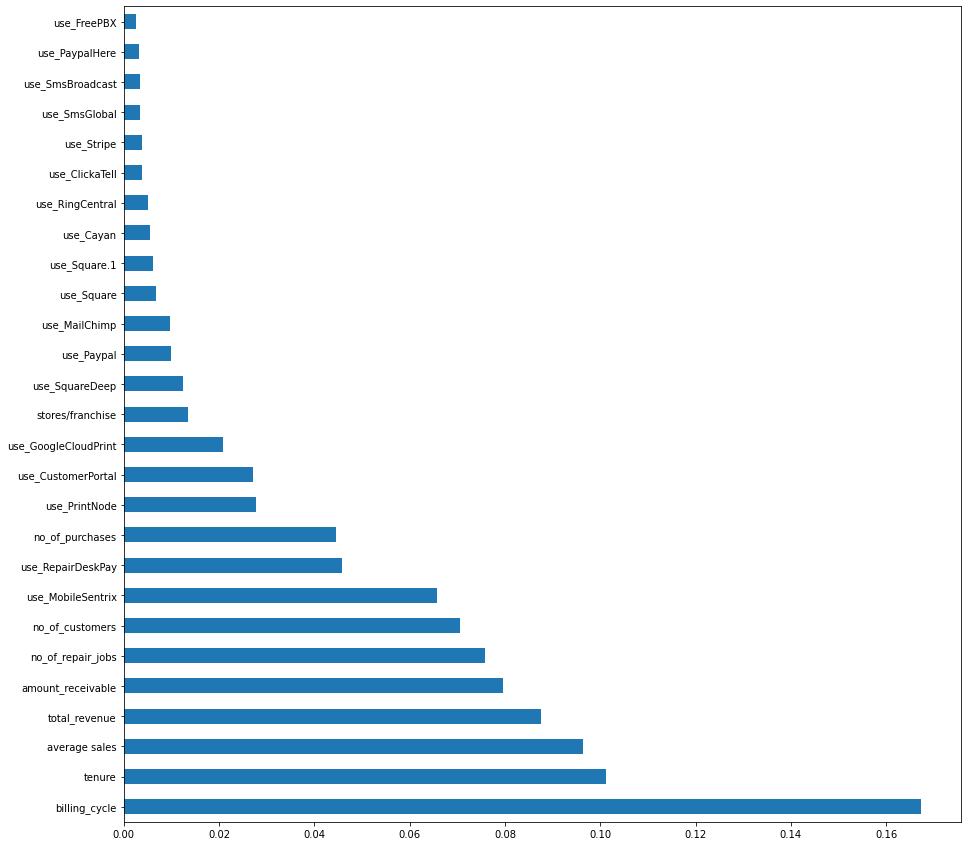

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
plt.figure(figsize=(15,15))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

### 5 Number summery

In [16]:
df.describe()

,billing_cycle,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,average sales
count,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,1.319600e+04,1.319600e+04,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,13196.000000,1.319600e+04
mean,0.043801,0.258866,1.178084,665.602910,548.340558,3.854313e+05,6.595264e+09,3.193089,0.036147,0.008184,0.009624,0.013565,0.006441,0.022355,0.038421,0.049257,0.019021,0.030540,0.008639,0.004926,0.006290,0.006744,0.030540,0.015005,0.002577,0.047287,0.094119,2.075705e+05
std,0.204660,0.745516,1.548692,8803.520021,4564.805919,2.219166e+07,7.575806e+11,45.004272,0.186664,0.090100,0.097633,0.115679,0.080002,0.147842,0.192217,0.216413,0.136604,0.172073,0.092547,0.070013,0.079061,0.081850,0.172073,0.121575,0.050696,0.212260,0.292006,9.373497e+06
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1.000000,5.000000,100.000000,649631.000000,370181.000000,2.433955e+09,8.702619e+13,2765.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.113184e+08


### Outlire Detection using Z Score
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured
while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
(https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [18]:
from scipy import stats
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
#     print(lower_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [19]:
out_column=['tenure','stores/franchise','no_of_repair_jobs','total_revenue','amount_receivable','no_of_purchases']
for c in out_column:
    print('smallest outliere value in {0} column is {1}'.format(c,min(find_anomalies(df[c]))))

smallest outliere value in tenure column is 3
smallest outliere value in stores/franchise column is 6
smallest outliere value in no_of_repair_jobs column is 27679
smallest outliere value in total_revenue column is 97897539.0
smallest outliere value in amount_receivable column is 87026194311346.5
smallest outliere value in no_of_purchases column is 139


greater then this value will be outlier

### Usign IQR
The interquartile range (IQR), is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, 
#### IQR = Q3 − Q1.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [20]:
def find_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
    
find_IQR(df)

       billing_cycle  tenure  ...  current_bussiness_status  average sales
0              False   False  ...                     False          False
1              False   False  ...                     False          False
2              False   False  ...                     False          False
3              False   False  ...                     False          False
4              False   False  ...                     False          False
...              ...     ...  ...                       ...            ...
13191          False   False  ...                     False          False
13192          False   False  ...                     False          False
13193          False   False  ...                     False          False
13194          False   False  ...                     False          False
13195          False   False  ...                     False          False

[13196 rows x 28 columns]


TypeError: ignored